# **quarentena_dados**

In [35]:
print("Hello, world!")

Hello, world!


In [0]:
import pandas as pd

## Importando tabelas

In [37]:
filmes = pd.read_csv("https://raw.githubusercontent.com/efochesatto/quarentena_dados/master/ml-latest-small/movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [38]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/efochesatto/quarentena_dados/master/ml-latest-small/ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [39]:
avaliacoes.shape

(100836, 4)

In [40]:
len(avaliacoes)

100836

## Lendo as tabelas

In [41]:
avaliacoes.query("movieId==1")

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [42]:
avaliacoes.query("movieId==1").mean()

userId       3.065302e+02
movieId      1.000000e+00
rating       3.920930e+00
timestamp    1.129835e+09
dtype: float64

In [43]:
avaliacoes.query("movieId==2").mean()

userId       3.295545e+02
movieId      2.000000e+00
rating       3.431818e+00
timestamp    1.135805e+09
dtype: float64

##Agrupando os filmes

In [44]:
avaliacoes.groupby("movieId").mean()
#média das avaliações dos filmes

,userId,rating,timestamp
movieId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [0]:
notas_medias_por_filme = avaliacoes.groupby("movieId")["rating"].mean()
#média das avaliações dos filmes, apenas a coluna da nota

In [46]:
filmes

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [47]:
notas_medias_por_filme

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [0]:
filmes_com_notas = filmes.join(notas_medias_por_filme, on="movieId")
#adicionando a coluna de notas (rating) à tabela filmes

In [51]:
filmes_com_notas

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [0]:
ordenando_melhores = filmes_com_notas.sort_values("rating")
#ordenando os filmes pela coluna de nota, que na ordenação padrão trará do menor para o maior

In [53]:
ordenando_melhores

,movieId,title,genres,rating
5554,26696,Lionheart (1990),Action,0.5
2689,3604,Gypsy (1962),Musical,0.5
4881,7312,"Follow Me, Boys! (1966)",Comedy|Drama,0.5
9117,145724,Idaho Transfer (1973),Sci-Fi,0.5
7297,76030,Case 39 (2009),Horror|Thriller,0.5
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [0]:
ordenando_melhores_maior_menor = filmes_com_notas.sort_values("rating", ascending=False)
#ordenando os filmes pela coluna de nota com "ascending=False" que trará ordenação do maior para o menor

In [55]:
ordenando_melhores_maior_menor

,movieId,title,genres,rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [0]:
melhores15 = filmes_com_notas.sort_values("rating", ascending=False).head(15)
#mostrando os 15 melhores filmes 

In [57]:
melhores15

,movieId,title,genres,rating
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


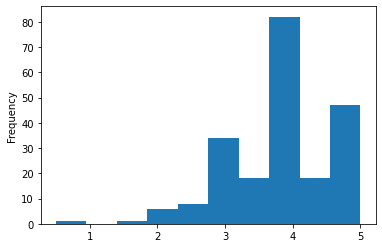

In [58]:
avaliacoes.query("movieId == 1")["rating"].plot(kind="hist")
#selecionando, na tabela avaliações, as notas do filme 1 e apresentando em histograma 

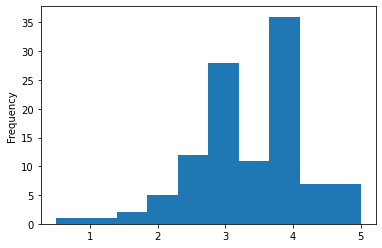

In [59]:
avaliacoes.query("movieId == 2")["rating"].plot(kind="hist")
#plotando as notas do segundo filme da lista geral

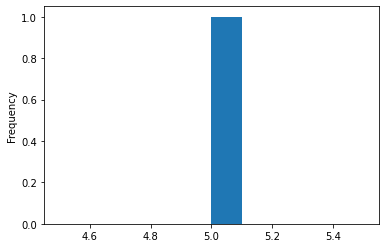

In [60]:
avaliacoes.query("movieId == 88448")["rating"].plot(kind="hist")
#plotando as notas do primeiro filme dos melhores
#o gráfico mostra que este filme tem média 5, mas teve apenas um voto e este voto foi 5;

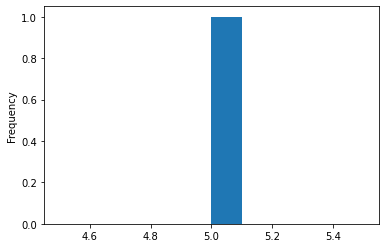

In [61]:
avaliacoes.query("movieId == 100556")["rating"].plot(kind="hist")
#plotando as notas do segundo filme dos melhores
#o gráfico mostra que este filme tem média 5, mas teve apenas um voto e este voto foi 5;